### Student Information
Name: 李書卉

Student ID: 109065702

GitHub ID: SHLee

Kaggle name: Merry Christmas!!

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

---
## Part 1 - Take Home Exercises

#### Additional steps

In [19]:
import pandas as pd

## load train/test data
train_df = pd.read_pickle("data/train_df.pkl")
test_df = pd.read_pickle("data/test_df.pkl")

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

/usr/lib/python3/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [21]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

In [34]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


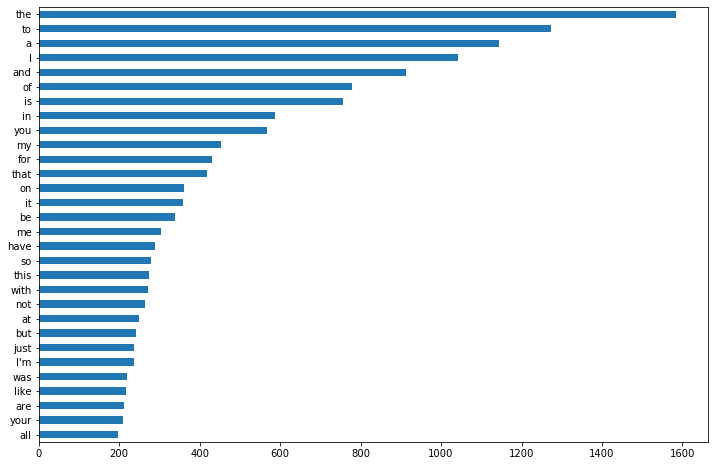

In [ ]:
# Plot train word frequency
import seaborn as sns
pd.Series(' '.join(train_df.text).split()).value_counts()[:30].sort_values().plot(kind='barh', figsize=(12,8))

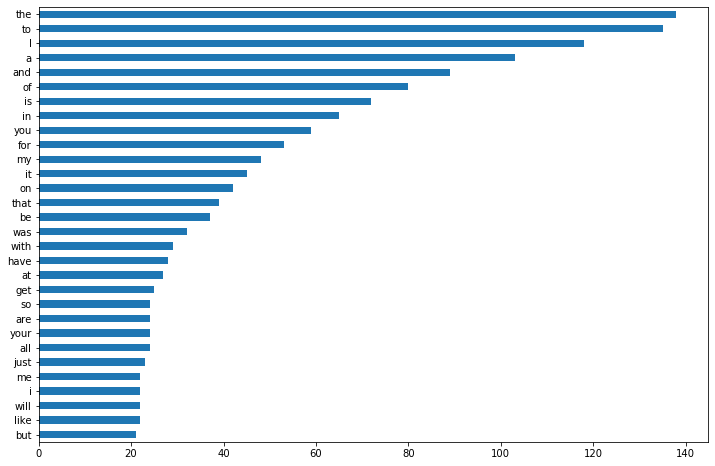

In [ ]:
# Plot test word frequency
pd.Series(' '.join(test_df.text).split()).value_counts()[:30].sort_values().plot(kind='barh', figsize=(12,8))

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

TFIDF_1000 = TfidfVectorizer(max_features=1000)
TFIDF_1000.fit_transform(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
print(train_data_TFIDF_features_1000.shape)
feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

(3613, 1000)


['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
### ** >>> Exercise 3 (Take home): **  
<table><tr>
    <td><img src="img/pic3.png" style="width: 250px;"/> </td>
</tr></table>

Can you interpret the results above? What do they mean?

In [ ]:
# Answer here

# 1. Anger and joy are distinguishable features, since there's only 6 anger misclassified as joy 
#    and 7 joy misclassified as anger.
# 2. 19 times the model misclassified fear as anger, so checking out and distinguishing
#    the similarities between the two could probably improve the model.
# 3. The number of times fear was correctly classified is really high (75), 
#    but the mistakes are evenly distributed among the other 3 classes.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

y_test_pred[:10]

## DecisionTree pred result
# array(['anger', 'fear', 'joy', 'fear', 'fear', 'joy', 'fear', 'sadness',
#        'fear', 'joy'], dtype=object)

array(['fear', 'fear', 'joy', 'fear', 'joy', 'sadness', 'sadness', 'joy',
       'sadness', 'sadness'], dtype='<U7')

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## DecisionTree accuracy
# training accuracy: 0.99
# testing accuracy: 0.64


training accuracy: 0.79
testing accuracy: 0.72


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

## DecisionTree confusion matrix
# [[55 16  9  4]
#  [15 70  9 16]
#  [ 5 13 54  7]
#  [ 9 14  9 42]]

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here

# The training accuracy of the Decision Tree model is incredibly high (0.99) but the 
# testing accuracy is a lot lower (0.64). In comparison, the training accuracy and 
# testing accuracy of the Naives Bayes model are much closer (0.79 & 0.72), and the testing
# accuracy is higher than that of the DT model. This suggests that the DT model is overfitting,
# which is pretty common for non-pruned DT models.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="img/pic1.png" style="width: 300px;"/> </td>
    <td><img src="img/pic2.png" style="width: 300px;"/> </td>
</tr></table>

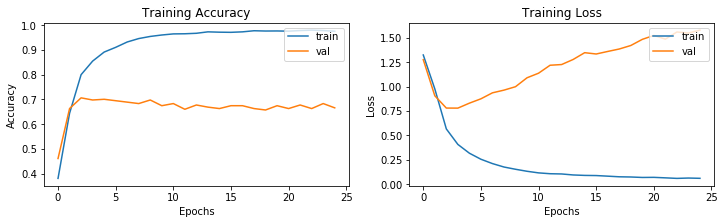

In [ ]:
# Answer here
from matplotlib import pyplot as plt

f = plt.figure(figsize=(12,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(training_log['accuracy'])
ax.plot(training_log['val_accuracy'])
ax.set_title('Training Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
ax.legend(['train', 'val'], loc='upper right')

ax2.plot(training_log['loss'])
ax2.plot(training_log['val_loss'])
ax2.set_title('Training Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['train', 'val'], loc='upper right')

plt.show()

In [ ]:
# Observation

# The training accuracy is much higher than validation accuracy and training loss is 
# much lower than validation loss, a clear case of overfitting. The model produces optimal 
# results after training for 3 or 4 epochs.


---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here

# 1. Summing the word vectors (with tf-idf weighting), downside is this ignores word order.
# 2. Using an embedding matrix.

# Alternative: Just use Google's Universal Sentence Encoder or doc2vec.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('mining_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
mining_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']


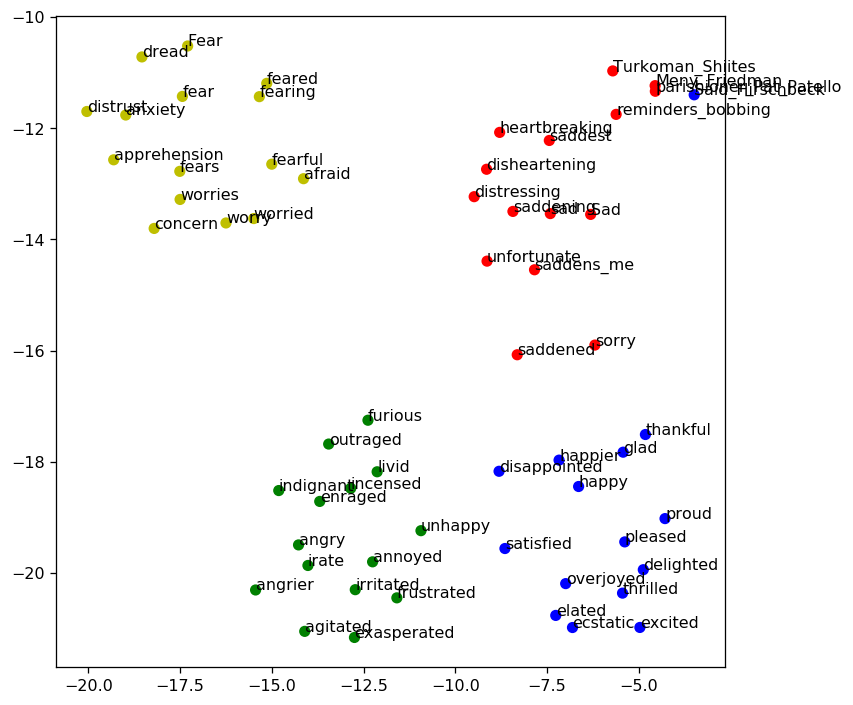

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
## Part 2 - Kaggle Emotion Recognition

### 2.1 Preprocessing the data
Here I converted and combined everything into one pandas dataframe, dropped irrelevant information (columns), then seperated and saved the training data and testing data to different pickle files. The data was extremely unbalanced, with joy being the most (516017) and anger being the least (39867), which I thought was pretty funny since the numbers would probably be reversed if we were using data from PTT. Anyway, I tried balancing the data by randomly sampling 50000, 193437 (the number of sad tweets, which is around the average number of tweets total), 154747 (average) and 300000 tweets from each class. The code for this part is shown below:

In [23]:
### load Kaggle data from json to dataframe
tweets_DM = pd.read_json("kaggle_data/tweets_DM.json", lines=True)
tweets_DM['temp'] = tweets_DM['_source'].apply(pd.Series)
tweets_DM = tweets_DM.join(tweets_DM['temp'].apply(pd.Series))
tweets_DM = tweets_DM.drop(['temp', '_source'] , axis=1)
tweets_DM.to_pickle("kaggle_data/tweets.pkl")

# tweets_DM = pd.read_pickle("kaggle_data/tweets.pkl")
tweets_DM.head()

,_score,_index,_crawldate,_type,hashtags,tweet_id,text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [32]:
# adding emotion labels and train/test idetification from csv files to tweet_id and text
tweets_DM_data = tweets_DM[['tweet_id', 'text']].copy()
tweets_set = pd.read_csv("kaggle_data/data_identification.csv")
tweets_class = pd.read_csv("kaggle_data/emotion.csv")
tweets_DM_data = tweets_DM_data.merge(tweets_set, how='left', on='tweet_id')
tweets_DM_data = tweets_DM_data.merge(tweets_class, how='left', on='tweet_id')

# seperating train and test data, save to pickle files
tweets_train = tweets_DM_data[tweets_DM_data.identification=='train']
tweets_test = tweets_DM_data[tweets_DM_data.identification=='test']
tweets_test.to_pickle("data/tweets_test.pkl")
tweets_train.to_pickle("data/notsampled_train.pkl")

# tweets_train = pd.read_pickle("data/notsampled_train.pkl")
tweets_train.head()

,tweet_id,text,identification,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


In [ ]:
tweets_train['emotion'].value_counts()

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64

In [ ]:
# setting aside dev set before sampling to prevent data leakage
from sklearn.model_selection import train_test_split
tweets_train,tweets_dev = train_test_split(tweets_train,test_size=0.20,random_state=20)

count = 50000

joy = tweets_train[tweets_train['label'] == 'joy']
anti = tweets_train[tweets_train['label'] == 'anticipation']
trust = tweets_train[tweets_train['label'] == 'trust']
sad = tweets_train[tweets_train['label'] == 'sadness']
disg = tweets_train[tweets_train['label'] == 'disgust']
fear = tweets_train[tweets_train['label'] == 'fear']
surp = tweets_train[tweets_train['label'] == 'surprise']
anger = tweets_train[tweets_train['label'] == 'anger']

s_joy = joy.sample(count, replace=True)
s_anti = anti.sample(count, replace=True)
s_trust = trust.sample(count, replace=True)
s_sad = sad.sample(count, replace=True)
s_disg = disg.sample(count, replace=True)
s_fear = fear.sample(count, replace=True)
s_surp = surp.sample(count, replace=True)
s_anger = anger.sample(count, replace=True)
sampled_train = pd.concat([s_sad, s_joy, s_anti, s_trust, s_disg, s_fear, s_surp, s_anger], axis=0)
sampled_train = sampled_train.sample(frac=1).reset_index(drop=True)

print('Random sampling:')
print(sampled_train['label'].value_counts())

Random sampling:
surprise        50000
anticipation    50000
joy             50000
sadness         50000
fear            50000
trust           50000
disgust         50000
anger           50000
Name: emotion, dtype: int64


I also tried removing stop words, lemmenization, and lowercasing, but they didn't make much of a difference and I think I accidentally deleted the code. If I had to attempt this task again, I would do something about the emojis as well, since they are likely helpful when it comes to emotion detection (when they aren't being used sarcastically anyway).

### 2.2 Word2Vec + Bidirectional LSTM
My first method was to train a BiLSTM with Word2Vec embeddings. I tokenized the text and added padding to make them all the same length, then used GoogleNews-vectors-negative300 to create an embedding matrix. LabelEncoder from scikit-learn was used to encode the labels. For the model, I added dropout layers both before and after bi-LSTM. I experimented with different metrics and balanced vs. unbalanced data. Interestingly, using unbalanced data had much better results than any of the balanced datasets, and the model that performed the best used adam as the optimizer and categorical_crossentropy as the loss, a batch size of 512 and was trained for 3 epochs. I say best, but I never got past 0.41419 on the public score using this method.

The code is in `biLSTM.py`.

### 2.3 BERT
After a few not-so-great attempts, I realized that BERT was probably the way to go. I chose to use AllenNLP, a PyTorch-based library designed to make building NLP models quicker and easier. I tried 2 models (bert-base-cased, roberta-base) with various learning rates and balanced vs. unbalanced data. RoBERTa seemed to perform better than BERT, and using balanced data was basically a waste of time. The best public score using this method was 0.56263, roberta-base with the unbalanced training set, 1e-05 learning rate. This was the one I used for the final submission, and it scored 0.56057 on the private dataset, landing me in 7th place.

The following table shows all the results:

| Model                            | Public score | Private score |
|----------------------------------|--------------|---------------|
| bert-base-cased, bal-50k, 3e-05  |    0.45759   |    0.45562    |
| bert-base-cased, bal-300k, 3e-05 |    0.46582   |    0.46184    |
| bert-base-cased, bal-155k, 3e-05 |    0.46802   |    0.46473    |
| roberta-base, unbal, 1e-05       |    0.56263   |    0.56057    |
| bert-base-cased, unbal, 1e-05    |    0.54286   |    0.53975    |
| roberta-base, bal-155k, 1e-05    |    0.48111   |    0.47827    |
| roberta-base, unbal, 2e-05       |    0.56168   |    0.55858    |

The code was altered from another NLP-related research I took part in, so I chose not to upload it.